In [339]:
import random
import pandas as pd
import numpy as np
import math
from scipy import stats
from math import factorial
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy.stats import skew

# Tarea 

a) Obtener, usando algún programa estadístico, las medidas de 
centralización y dispersión para cada uno de los dos grupos de control de <br>
la variable (grupo 1 y grupo 2) que mide la presión sistólica antes de la <br>
toma del medicamento e indica si la media en cada uno de estos grupos <br>
puede considerarse representativa a partir de los datos obtenidos. <br> 
<br> 

b) Estudiar la simetría y la curtosis del nivel de presión sistólica en los <br>
pacientes del segundo grupo para cada una de las mediciones de la <br>
hipertensión que aparecen en la tabla. <br>
<br>
c) Indicar para cada una de las variables relacionadas con la medición <br>
de la presión sistólica que aparecen en el fichero el valor de los cuartiles <br>
y su significado y obtener el box- plot ( diagrama de cajas) <br>
correspondiente. Estudiar la presencia de valores atípicos<br>
<br>

d) Estudiar la normalidad de los datos de las variables relacionadas con <br>
la medición de la presión sistólica. <br>

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import kurtosis
from scipy.stats import skew
hipertension =  pd.read_excel("HIPERTENSION.xlsx")

In [353]:
# Segmentar grupos
hipertension.rename(columns={"Presion sistólica antes":"Presion sistolica antes", "Presión sistólica después": "Presion sistolica despues"}, inplace=True)
hipertension_grupo1 = hipertension[hipertension["Grupo"] == 1]
hipertension_grupo2 = hipertension[hipertension["Grupo"] == 2]


## a)

Obtener, usando algún programa estadístico, las medidas de  <br>
centralización y dispersión para cada uno de los dos grupos de control de <br>
la variable (grupo 1 y grupo 2) que mide la presión sistólica antes de la <br>
toma del medicamento e indica si la media en cada uno de estos grupos <br>
puede considerarse representativa a partir de los datos obtenidos. <br> 
<br> 

In [354]:
# Imprimir medidas de centralización y dispersión (rangos interquartiles)
print("Estadistica descriptiva de presion sistolica para grupo 1")
print(hipertension_grupo1["Presion sistolica antes"].describe())
print("Moda grupo 1")
print(hipertension_grupo1["Presion sistolica antes"].mode()[0])
print("Mediana grupo 1")
print(hipertension_grupo1["Presion sistolica antes"].median())

print('----------------------------------------------------------')
print("Estadistica descriptiva de presion sistolica para grupo 2")
print(hipertension_grupo2["Presion sistolica antes"].describe())
print("Moda grupo 2")
print(hipertension_grupo2["Presion sistolica antes"].mode()[0])
print("Mediana grupo 2")
print(hipertension_grupo2["Presion sistolica antes"].median())


Estadistica descriptiva de presion sistolica para grupo 1
count     40.000000
mean     123.425000
std        9.026705
min      105.000000
25%      117.500000
50%      124.500000
75%      129.000000
max      142.000000
Name: Presion sistolica antes, dtype: float64
Moda grupo 1
121
Mediana grupo 1
124.5
----------------------------------------------------------
Estadistica descriptiva de presion sistolica para grupo 2
count     60.000000
mean     127.483333
std       13.888773
min       96.000000
25%      118.750000
50%      126.000000
75%      138.250000
max      154.000000
Name: Presion sistolica antes, dtype: float64
Moda grupo 2
121
Mediana grupo 2
126.0


La diferencia en medias parece variar muy poco de grupo a grupo con el el grupo 2 teniendo una <br>
Presión sistólica ligeramente más elevada, congruente con el hecho de que las personas mayores <br>
Suelen tener un mayor nivel de presión, que la gente joven.

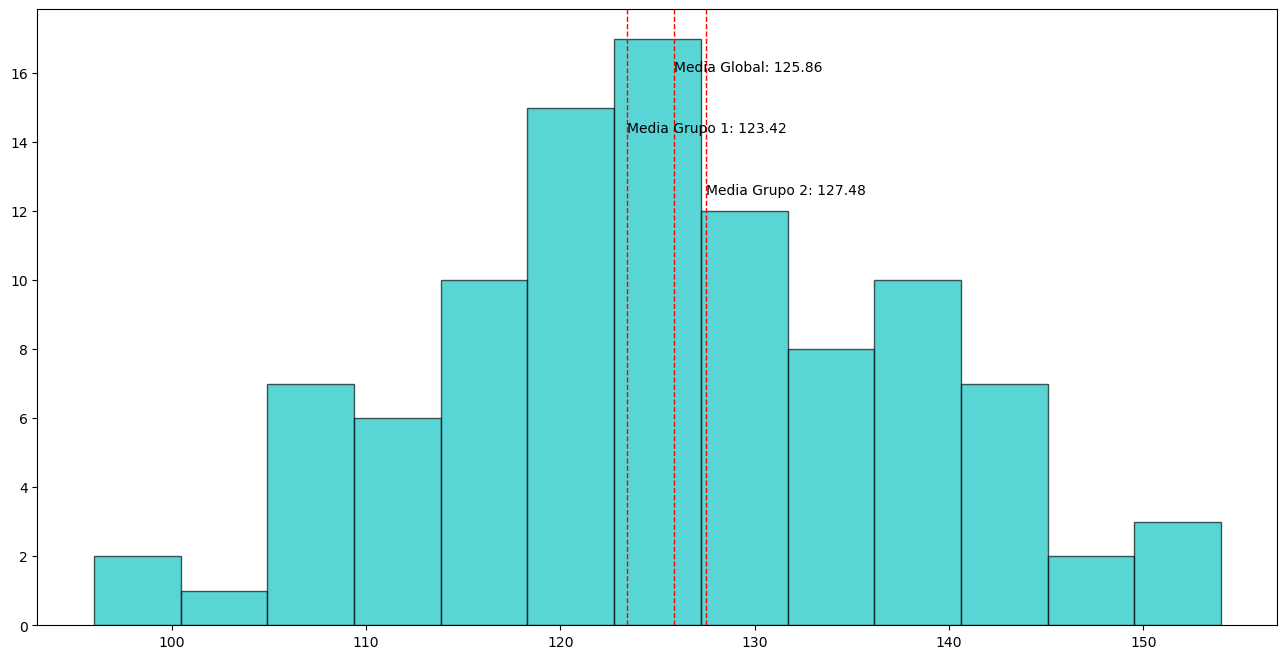

In [359]:
# Indicar si la media es representativa a partir de los datos obtenidos
# 1. Visualizar media global y de grupos 1 y 2 para ver sus diferencias.
plt.figure(figsize=(16,8))
plt.hist(hipertension["Presion sistolica antes"], bins=13, color='c', edgecolor='k', alpha=0.65)
plt.axvline(hipertension["Presion sistolica antes"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(hipertension_grupo1["Presion sistolica antes"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(hipertension_grupo2["Presion sistolica antes"].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(hipertension["Presion sistolica antes"].mean(),  max_ylim*0.9,"Media Global: {:.2f}".format(hipertension["Presion sistolica antes"].mean()))
plt.text(hipertension_grupo1["Presion sistolica antes"].mean(), max_ylim*0.80,"Media Grupo 1: {:.2f}".format(hipertension_grupo1["Presion sistolica antes"].mean()))
plt.text(hipertension_grupo2["Presion sistolica antes"].mean(), max_ylim*0.70,"Media Grupo 2: {:.2f}".format(hipertension_grupo2["Presion sistolica antes"].mean()))

plt.show()

Para responder la pregunta de si la media en ambos grupos puede considerarse representativa, podemos hacer lo siguiente:
- 1. Visualizar la diferencias entre media y mediana en ambos grupos <br>
Esto nos indicaria si la distribución presenta un sesgo hacía alguna dirección, en el caso en que sean cercana una a la otra <br>
significaría que la media es una medición de centralidad representativa.
- 2. Prueba de Normalidad <br>
La prueba de Shapiro-Wilk evalua si los datos se distribuyen de forma normal, en el caso de que así lo sea, la media puede <br>
considerarse como un buen representante de la tendencia central, en el caso que no lo sea no necesariamente implica que la media no sea una buena tendencia unicamente es un analísis complementario.



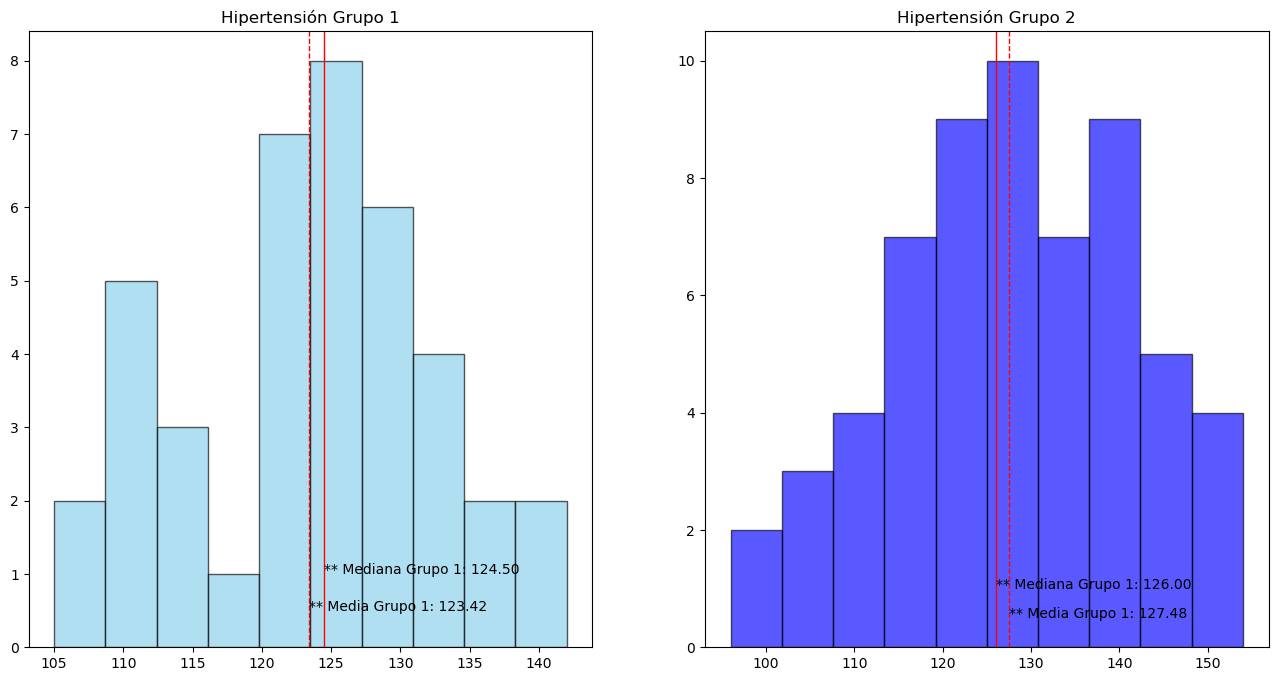

In [361]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].hist(hipertension_grupo1["Presion sistolica antes"], bins=10, color='skyblue', edgecolor='k', alpha=0.65)
axs[0].axvline(hipertension_grupo1["Presion sistolica antes"].mean(), color="red", linestyle="dashed", linewidth=1)
axs[0].axvline(hipertension_grupo1["Presion sistolica antes"].median(), color="red", linestyle="solid", linewidth=1)

min_ylim, max_ylim = plt.ylim()
axs[0].text(hipertension_grupo1["Presion sistolica antes"].mean(), max_ylim*0.5,"** Media Grupo 1: {:.2f}".format(hipertension_grupo1["Presion sistolica antes"].mean()))
axs[0].text(hipertension_grupo1["Presion sistolica antes"].median(), max_ylim*1,"** Mediana Grupo 1: {:.2f}".format(hipertension_grupo1["Presion sistolica antes"].median()))
axs[0].set_title("Hipertensión Grupo 1")

axs[1].hist(hipertension_grupo2["Presion sistolica antes"], bins=10, color='blue', edgecolor='k', alpha=0.65)
axs[1].axvline(hipertension_grupo2["Presion sistolica antes"].mean(), color="red", linestyle="dashed", linewidth=1)
axs[1].axvline(hipertension_grupo2["Presion sistolica antes"].median(), color="red", linestyle="solid", linewidth=1)
axs[1].text(hipertension_grupo2["Presion sistolica antes"].mean(), max_ylim*0.5,"** Media Grupo 1: {:.2f}".format(hipertension_grupo2["Presion sistolica antes"].mean()))
axs[1].text(hipertension_grupo2["Presion sistolica antes"].median(), max_ylim*1,"** Mediana Grupo 1: {:.2f}".format(hipertension_grupo2["Presion sistolica antes"].median()))
axs[1].set_title("Hipertensión Grupo 2")
plt.savefig("Estudio-simetria.png")
plt.show()

Viendo las diferencias entre media y mediana en ambos grupos es claro que nos encontramos con distribuciones ligeramente sesgada <br>
Utilizando el siguiente coeficiente de simetria obtenemos:
$$ 𝑔𝑝 = \frac{\bar{𝑥}−𝑀𝑜} {𝑠𝑥} = \frac{3(\bar{𝑥}−𝑀𝑒)}{s_{x}} 𝑠𝑥 $$ 

In [249]:
print(skew(hipertension_grupo1["Presion sistolica antes"]))
print(skew(hipertension_grupo2["Presion sistolica despues"]))

-0.13302261620139963
-0.18889780238068857


In [379]:
media_grupo1 = hipertension_grupo2["Presion sistolica antes"].mean() 
mediana_grupo1  = hipertension_grupo2["Presion sistolica antes"].median()
desviacion_grupo1 = hipertension_grupo2["Presion sistolica antes"].std() 

media_grupo2 = hipertension_grupo2["Presion sistolica despues"].mean() 
mediana_grupo2  = hipertension_grupo2["Presion sistolica despues"].median()
desviacion_grupo2 = hipertension_grupo2["Presion sistolica despues"].std() 


In [381]:
3*(media_grupo1 - mediana_grupo1) / desviacion_grupo1

0.320402667499075

In [380]:
3*(media_grupo2 - mediana_grupo2) / desviacion_grupo2

0.42253196257272546

Lo que significa que en los dos grupos la distribución es asimetrica y negativa.

# B)
Estudiar la simetría y la curtosis del nivel de presión sistólica en los pacientes del segundo grupo para cada una de las mediciones <br>
de la hipertensión que aparecen en la tabla.

Para estudiar el nivel de kurtosis que presenta el grupo 2, es adecuado usar la prueba de la libreria scipy de curtosis <br>
En donde existen 3 posibilidades: <br>
1. Leptocúrtica: En el caso de que los datos esten muy concentrados a la media (curtosis mayor a 0)
2. Platicúrtica: En el caso de que los datos están muy dispersos (curtosis menor a 0)
3. Mesocúrtica: Tiene un comportamiento normal y la curtosis es igual a 0.

In [165]:
# Presion sistolica grupo 2 antes de tratamiento
print(kurtosis(hipertension_grupo2["Presion sistólica antes"],  bias=True))
print(kurtosis(hipertension_grupo2["Presión sistólica después"], bias=True))
print(kurtosis(hipertension_grupo2["Colesterol total"], bias=True))

-0.6514026345557893
0.24077162472949976
0.461364724676236


### Curtosis Grupo 2.
### Presión sistólica antes
El resultado anterior [-0.65140] nos dice que en el caso de la presión sistolica antes del tratamiento tenemos una distribución Platicúrtica, <br>
lo que indica que nuestros datos estan dispersos. <br>

### Presión sistólica después
También [0.24077] nos indica que la presión sistolica después del tratamiento es leptocúrtica, lo que sugiere de forma preliminar que el medicamento <br>
esta acotando los valores extremos de la distribución y regulando el nivel de presión en el grupo2.

### Colesterol total
El colesterol total [0.4613] parece estar centrado alrededor de una media y la destribución es Leptocúrtica.

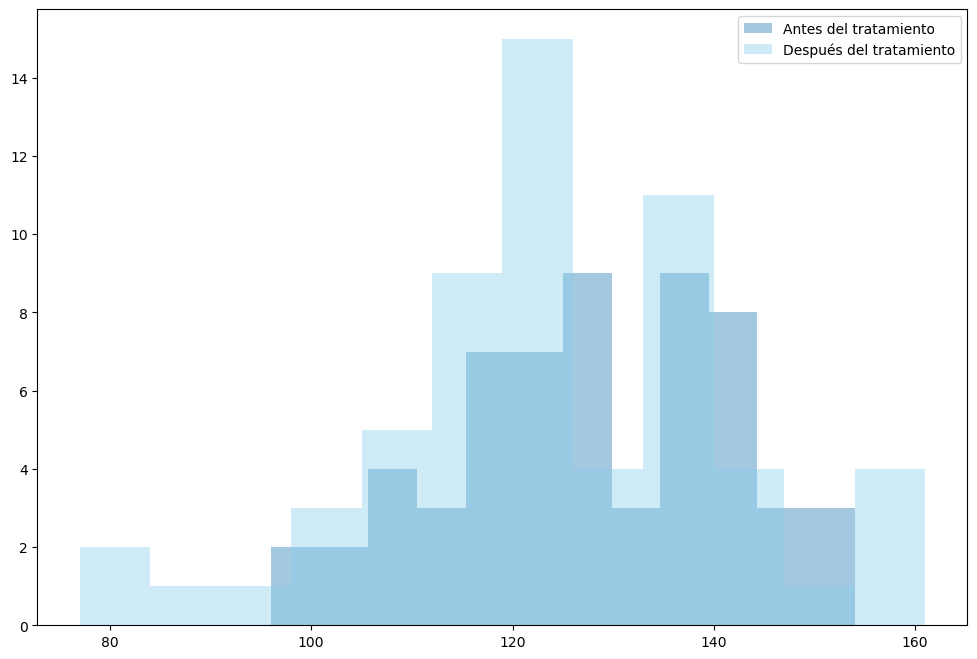

In [222]:
plt.figure(figsize=(12, 8))
plt.hist(hipertension_grupo2["Presion sistolica antes"], alpha=0.4, label="Antes del tratamiento", bins=12)
plt.hist(hipertension_grupo2["Presion sistolica despues"], color='skyblue',  alpha=0.4, label="Después del tratamiento", bins=12)
plt.legend(loc='upper right')
plt.show()


Un analísis visual de la distribución antes y despues del tratamiento parece indicar que existe mayor variabilidad despues de la aplicación del medicamento, <br>
Ademas en las dos distribuciones parece haber un distribución aproximadamente normal, sin embargo, parece que no es posible hacer un juicio exacto, <br>
dado que existen muy pocos datos.

## C)
Indicar para cada una de las variables relacionadas de la presión sistólica los valores de sus cuartiles y su significado. <br>
Estudiar la presencia de valores atípicos.

## Rango Interquartil antes de medicamento

In [189]:
print(hipertension["Presion sistólica antes"].quantile([0.25, 0.50, 0.75]))

0.25    118.0
0.50    125.0
0.75    135.0
Name: Presion sistólica antes, dtype: float64


## Rango Interquartil después de medicamento

In [191]:
print(hipertension["Presión sistólica después"].quantile([0.25, 0.50, 0.75]))

0.25    115.00
0.50    120.00
0.75    131.25
Name: Presión sistólica después, dtype: float64


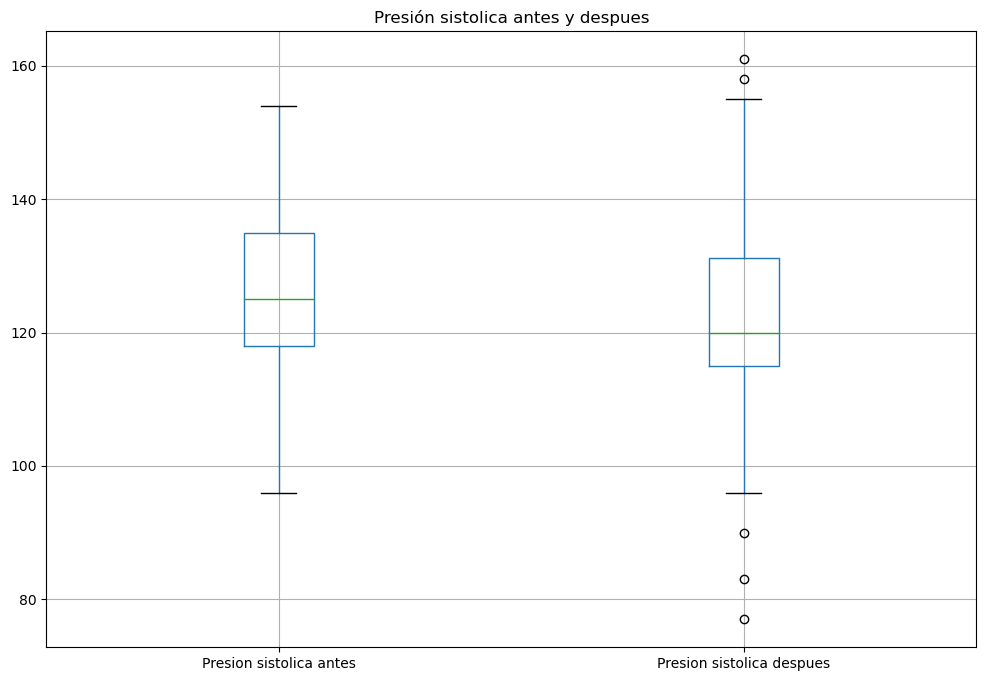

In [385]:
plt.figure(figsize=(12,8))
plt.title("Presión sistolica antes y despues")
hipertension.boxplot(column=["Presion sistolica antes", "Presion sistolica despues"])
plt.show()

Tal y como se menciona en la clase se puede seleccionar los outliers a aquellas observaciones que esten a más de 3 <br>
desviaciones tipicas de la media, pero como se puede observar en el código no existen observaciones que esten <br>
más lejos que 3 desviaciones tipicas.

In [263]:
rango_superior_outliers = media + hipertension["Presion sistolica antes"].std() * 3
rango_inferior_outliers = media - hipertension["Presion sistolica antes"].std() * 3
rango_inferior_outliers, rango_superior_outliers

(88.98916895677314, 162.73083104322686)

In [275]:
media = hipertension["Presion sistolica antes"].mean()
desviaciones_estandar_3 = hipertension["Presion sistolica antes"].std() * 3 
hipertension.loc[((hipertension["Presion sistolica antes"] < 88.98) | (hipertension["Presion sistolica antes"] > 160.73))] # Vacio

,Grupo,Edad,Presion sistolica antes,Presion sistolica despues,Colesterol total


Para seleccionar los datos atipicos escogí la una forma basado en percentiles en donde utilizó el top 2.5% <br>
de los valores más altos de presión sistolica antes del medicamento tanto en el rango superior como el inferior <br>

In [218]:
#hipertension.rename(columns={"Presion sistólica antes":"Presion sistolica antes", "Presión sistólica después": "Presion sistolica despues"}, inplace=True)
#hipertension_grupo1.rename(columns={"Presion sistólica antes":"Presion sistolica antes", "Presión sistólica después": "Presion sistolica despues"}, inplace=True)
#hipertension_grupo2.rename(columns={"Presion sistólica antes":"Presion sistolica antes", "Presión sistólica después": "Presion sistolica despues"}, inplace=True)
hipertension[((hipertension["Presion sistolica antes"] > hipertension["Presion sistolica antes"].quantile(0.975)) | (hipertension["Presion sistolica antes"] < hipertension["Presion sistolica antes"].quantile(0.025)))].sort_values("Presion sistolica antes")

,Grupo,Edad,Presion sistolica antes,Presion sistolica despues,Colesterol total
54,2,63,96,96,154
80,2,45,100,77,190
68,2,80,102,101,183
42,2,76,151,158,246
61,2,50,153,161,179
98,2,52,154,155,270


In [208]:
hipertension["Colesterol total"].describe()

count    100.000000
mean     196.190000
std       27.102758
min      150.000000
25%      179.000000
50%      190.000000
75%      203.000000
max      298.000000
Name: Colesterol total, dtype: float64

Si observamos a estos datos atipicos podemos notar que en el caso de 2 de las 3 personas con presión alta, <br>
también se tiene un colesterol muy alto relativo a la distribución de la variable colesterol total <br>
Por lo que parece existir una relación positiva entre el nivel de presión sistolica y el colesterol. <br>
Asimismo, en el caso de las personas con menor nivel de presión, se puede observar un colesterol bajo y también una edad mayor a la promedio.

# D)
## Estudiar la normalidad de los datos de las variables relacionadas con la medición de la presión sistólica.
Como se puede observar en los siguientes resultados no se puede rechazar la hipotesis nula de normalidad en ninguna de las variables de presión en ninguno de los grupo dado que el valor p > 0.05. Utilizando la prueba de Shapiro.


In [220]:
from scipy.stats import norm
print("Pruebas Shapiro")
print(shapiro(hipertension["Presion sistolica antes"]))
print(shapiro(hipertension["Presion sistolica despues"]))
print(shapiro(hipertension_grupo1["Presion sistolica antes"]))
print(shapiro(hipertension_grupo1["Presion sistolica despues"]))
print(shapiro(hipertension_grupo2["Presion sistolica antes"]))
print(shapiro(hipertension_grupo2["Presion sistolica despues"]))

Pruebas Shapiro
ShapiroResult(statistic=0.9919236302375793, pvalue=0.8156657218933105)
ShapiroResult(statistic=0.9788827300071716, pvalue=0.1087479442358017)
ShapiroResult(statistic=0.9761654138565063, pvalue=0.5499194264411926)
ShapiroResult(statistic=0.9786727428436279, pvalue=0.6403394937515259)
ShapiroResult(statistic=0.9811716675758362, pvalue=0.4800701141357422)
ShapiroResult(statistic=0.9806032776832581, pvalue=0.4545860290527344)


# Ejercicio 2
Se quiere estudiar la relación existente entre la presión sitólica después de la toma del medicamento <br>
y el colesterol total del paciente en los paciente jóvenes (grupo 1).
## a) 
Estudiar la relacion lineal existente estas dos variables de estudio
## b) 
obtener un modelo lineal 
que explica la presión sistólica del paciente joven a los 60 minutos <br>
de ingerir el medicamento en función de su colesterol total y realizar la estimación para un <br>
paciente del grupo 1 (joven= cuyo colesterol total es de 105 mg/Dl <br>
## c)
¿Qué tanto por ciento de la presión sistólica del paciente joven a los <br>
60 minutos de ingerir el medicamento no queda explicado por el anterior modelo? <br> 
¿Cómo podrías mejorar el modelo? <br>
## d) 
Si aumentásemos el colesterol de un paciente en 5 mg /Dl ¿Qué <br>
variación experimentaría su presión sistólica despés de 60 minutos de <br>
ingerir el medicamento. 

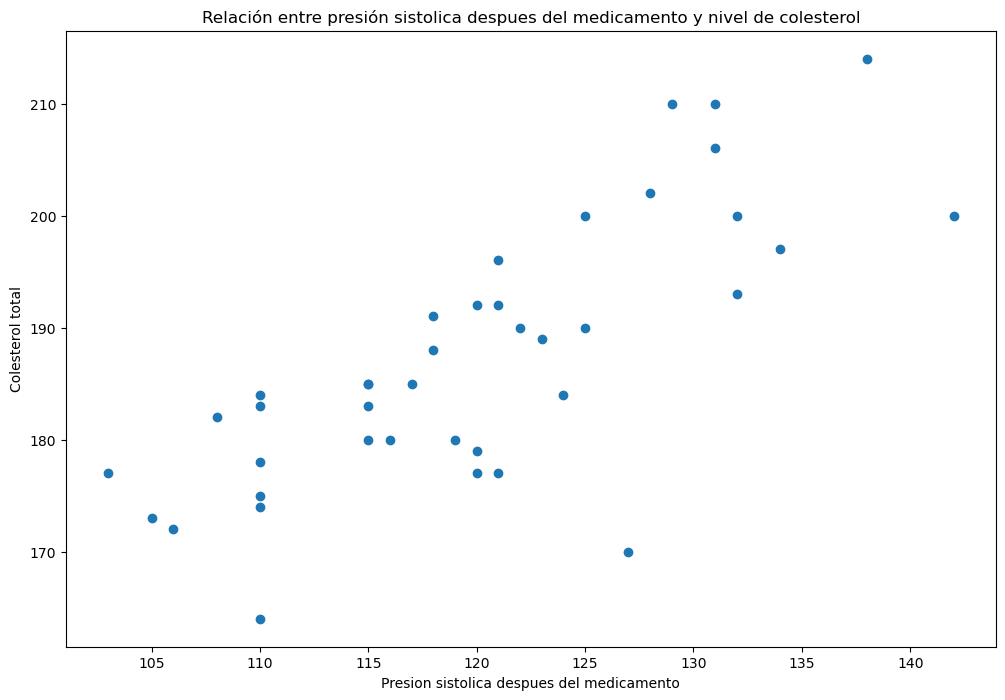

In [229]:
plt.figure(figsize=(12, 8))
plt.title("Relación entre presión sistolica despues del medicamento y nivel de colesterol")
plt.scatter(hipertension_grupo1["Presion sistolica despues"], hipertension_grupo1["Colesterol total"])
plt.xlabel("Presion sistolica despues del medicamento")
plt.ylabel("Colesterol total")
plt.savefig("Relacion-Lineal" 
plt.show()


El gráfico de dispersión muestra una relación positiva entre el nivel de presión sistolica <br>
despues de la aplicación del medicamento y el nivel de colesterol total, <br>
hecho que puede confirmarse a través del calculo de correlación de variables.

In [233]:
hipertension_grupo1.corr(method="pearson" )

,Grupo,Edad,Presion sistolica antes,Presion sistolica despues,Colesterol total
Grupo,NaN,NaN,NaN,NaN,NaN
Edad,NaN,1.000000,0.247346,0.145001,0.225852
Presion sistolica antes,NaN,0.247346,1.000000,0.852656,0.805356
Presion sistolica despues,NaN,0.145001,0.852656,1.000000,0.767135
Colesterol total,NaN,0.225852,0.805356,0.767135,1.000000


En la anterior matriz de correlación podemos observar una correlación positiva <br>
entre colesterol total y el nivel de presión sistólica, tanto antes como <br> 
después de la aplicación del medicamento.

## b) 
Obtener un modelo de lineal entre presión sistolica y colesterol total <br>

In [386]:
# Usar poblacion joven
y = hipertension_grupo1['Presion sistolica despues'].values.reshape(-1, 1)
x = hipertension_grupo1["Colesterol total"].values.reshape(-1, 1)
model = LinearRegression().fit(x,y)
r_cuadrada = model.score(x, y)
print(f"Coefficiente de determinacion: {r_cuadrada}")
print(f"Intercepto: {model.intercept_}")
print(f"coefficiente : {model.coef_}")

Coefficiente de determinacion: 0.5884962791022138
Intercepto: [6.16987412]
coefficiente : [[0.60761387]]


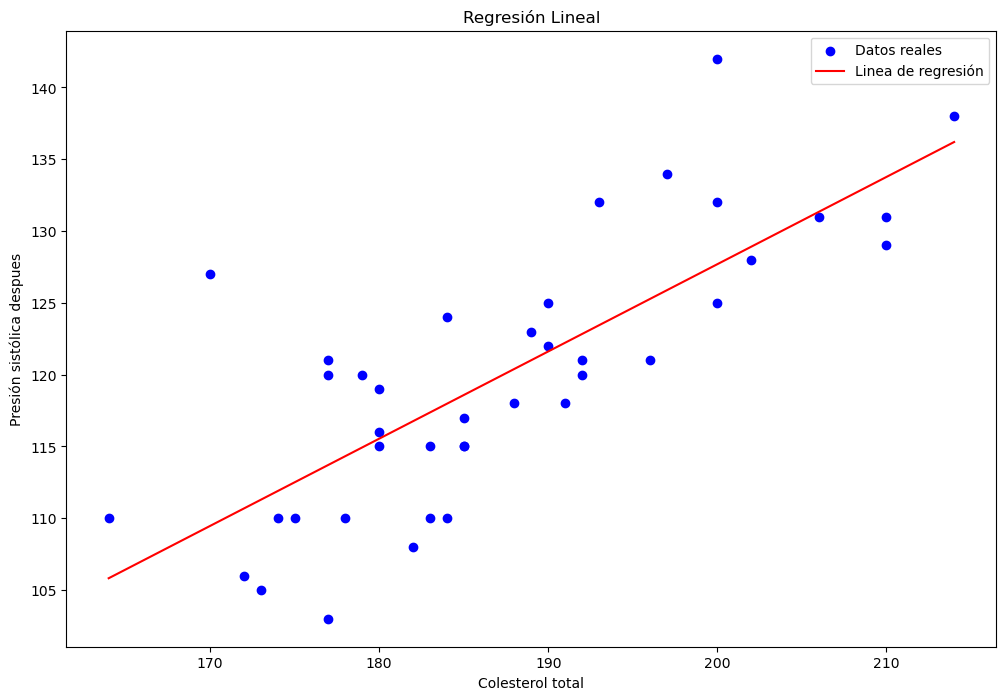

In [390]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Datos reales') 
x_modelo = np.linspace(x.min(), x.max(), 100)
y_modelo = model.predict(x_modelo.reshape(-1, 1))
plt.plot(x_modelo, y_modelo, color='red', label='Linea de regresión')
plt.title('Regresión Lineal') 
plt.xlabel("Colesterol total")
plt.ylabel("Presión sistólica despues")
plt.legend()
plt.show()

In [323]:
from statsmodels.api import OLS
model_summary = OLS(hipertension_grupo1["Presion sistolica despues"], hipertension_grupo1["Colesterol total"]).fit().summary() 
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Presion sistolica despues   R-squared (uncentered):                   0.998
Model:                                   OLS   Adj. R-squared (uncentered):              0.998
Method:                        Least Squares   F-statistic:                          1.603e+04
Date:                       Thu, 23 Nov 2023   Prob (F-statistic):                    1.30e-52
Time:                               15:45:13   Log-Likelihood:                         -127.92
No. Observations:                         40   AIC:                                      257.8
Df Residuals:                             39   BIC:                                      259.5
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Colesterol total     0.6405      0.005    126.605      0.000       0.630       0.651
==============================================================================
Omnibus:                        7.895   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.646
Skew:                           0.904   Prob(JB):                       0.0360
Kurtosis:                       3.847   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [393]:
6.1698 + (105 * 0.60761)

69.96885

In [330]:
# Realizar estimacion para un paciente del grupo 1 cuyo colesterol es 105 mg/Dl
intercepto = model.intercept_
pendiente = model.coef_[0]
colesterol_paciente = 105
presion_estimada = model.predict(np.array([[colesterol_paciente]]))[0]

intercepto, pendiente, presion_estimada 
# La presión estimada es de 70.

(array([6.16987412]), array([0.60761387]), array([69.96933034]))

In [332]:
# ¿Qué tanto por ciento de la presión sistolica del paciente joven no queda explicado por el anterior modelo
r_cuadrado = model.score(x, y)
variacion_no_explicada = (1 - r_cuadrado) * 100
r_cuadrado, variacion_no_explicada


(0.5884962791022138, 41.15037208977862)

Se puede explicar el 58% de la variación con el modelo anterior <br>
y el 41.15 % queda sin explicar. <br>

Para mejorar el modelo, podríamos incluir más variables, como el peso <br>
estilo de vida, nivel de estres etc... <br> 

También se podría revisar la calidad de los datos para estar seguros <br>
que las mediciones son correctas.

In [334]:
# Si aumentasamos el colesterol del paciente en 5mg Qué variación
# experimentaría su presión sistólica después de 60 minutos
incremento_en_colesterol = 5
variacion_presion_sistolica = pendiente * incremento_en_colesterol
variacion_presion_sistolica

array([3.03806934])

El resultado de la variación sistolica es 3.0380 con un incremento de 5 mg <br>
en colesterol. 

# Ejercicio 3
- a) Se quiere estudiar si se puede admitir que la presión sistólica media en el momento de la ingestión de la población adulta (grupo 2) es 130 mm de Hg. Obtener el intervalo de confianza al 95% y al 99% para el nivel medio de presión sistolica antes de la toma del medicamento en el grupo de los adultos y posteriormente contesta a la cuestión planteada con los resultados obtenidos o mediante contraste de hipótesis.

In [394]:

presion_sistolica_grupo2 = hipertension_grupo2["Presion sistolica antes"]
media_presion_grupo2 = np.mean(presion_sistolica_grupo2)
std_presion_grupo2 = np.std(presion_sistolica_grupo2, ddof=1) # grados de libertad = 1
n_grupo2 = len(hipertension_grupo2)

intervalo_95 = stats.t.interval(0.95, df=n_grupo2-1, loc=media_presion_grupo2, scale=std_presion_grupo2/ np.sqrt(n_grupo2))
intervalo_99 = stats.t.interval(0.99, df=n_grupo2-1, loc=media_presion_grupo2, scale=std_presion_grupo2/ np.sqrt(n_grupo2))

media_presion_grupo2, intervalo_95, intervalo_99

(127.48333333333333,
 (123.8954827544782, 131.07118391218847),
 (122.71071226981006, 132.25595439685662))

In [396]:
std_presion_grupo2

13.888773257522427

In [395]:
t_estadistico = (media_presion_grupo2 - 130) / (std_presion_grupo2 / np.sqrt(n_grupo2))
p_value =stats.t.sf(np.abs(t_estadistico), n_grupo2 - 1) * 2
print(f"'Estadistico t: {t_estadistico}")
print(f"P-valor: {p_value}")

'Estadistico t: -1.4035808501195255
P-valor: 0.1656852574507901


La presion sistolica media antes de la toma del medicamento es 127.4833, los intervalos de confianza son: <br>
Intervalo de confianza al 99%: Entre 123.90 y 131.07 mm Hg. <br>
Intervalo de confianza al 95%: Entre 127.71 y 132.26 mm Hg <br>

Dado que el valor hipotético de 130 mm Hg cae dentro de ambos intervalos de confianza no se rechaza la hipotesís nula <br>
por lo que es razonable admitir que la presión sistolica media de esta población podría ser 130 mm Hg.

## b)
Obtener el intervalo de confianza al 95% para la diferencia de medias
en la presión sistólica entre adultos yjóvenes después de la ingestión 
del medicamento. ¿Se puede concluir que después de la ingesta del 
medicamento la presión sistólica media de la población es distinta 
dependiendo de la edad

In [343]:
presion_sistolica_despues_grupo1 = hipertension_grupo1["Presion sistolica despues"]
presion_sistolica_despues_grupo2 = hipertension_grupo2["Presion sistolica despues"]

media_grupo1 = np.mean(presion_sistolica_despues_grupo1)
std_grupo1 = np.std(presion_sistolica_despues_grupo1, ddof=1)
n_grupo1 = len(presion_sistolica_despues_grupo1)

media_grupo2 = np.mean(presion_sistolica_despues_grupo2)
std_grupo2 = np.std(presion_sistolica_despues_grupo2, ddof=1)
n_grupo2 = len(presion_sistolica_despues_grupo2)

diferencia = np.sqrt(std_grupo1**2/n_grupo1 + std_grupo2**2/n_grupo2)
diferencia_media = media_grupo1 - media_grupo2
intervalo_confianza_diferencia = stats.t.interval(0.95, df=min(n_grupo1-1, n_grupo2-1),
                                                  loc=diferencia_media, scale=diferencia)

media_grupo1, media_grupo2, intervalo_confianza_diferencia


(119.9, 123.45, (-8.985406196829288, 1.885406196829294))

Basandonos en el intervalo de confianza del 95% y las medias de 119.9 y 123.45, no podemos decir con 95% de confianza <br> 
que existe una diferencia de medias significativa.

## c)
Se quiere estudiar la proporción de la población con una presión 
sistólica inicial igual o superior a 130 mm de Hg (prehipertensión). A 
partir de la muestra del fichero (tomando todos los datos de presión 
sistólica antes de la toma del medicamento) obtener un intervalo de 
confianza al 99% de la proporción de la población con hipertensión y 
contrastar la hipótesis que el porcentaje de la población con presión 
sistólica superior o igual a 130 mm de Hg es 0,30 con nivel de
significación del 5%.


In [346]:
presion_sistolica_antes = hipertension["Presion sistolica antes"]
n = len(presion_sistolica_antes)
n_prehipertension = np.sum(presion_sistolica_antes >= 130)
p_muestra = n_prehipertension / n

z = stats.norm.ppf(0.995)
se = np.sqrt(p_muestra * (1 - p_muestra) / n)
intervalo_confianza = (p_muestra - z * se, p_muestra + z * se)

p_null = 0.30
z_score_test = (p_muestra - p_null) / np.sqrt(p_null * (1 - p_null) / n)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score_test)))

print(f"Proporción de la muestra con prehipertensión: {p_muestra}")
print(f"Intervalo de confianza al 99%: {intervalo_confianza}")
print(f"Valor de Z para la prueba de hipótesis: {z_score_test}")
print(f"P-valor de la prueba de hipótesis: {p_value}")

Proporción de la muestra con prehipertensión: 0.35
Intervalo de confianza al 99%: (0.22714077255930973, 0.4728592274406902)
Valor de Z para la prueba de hipótesis: 1.0910894511799616
P-valor de la prueba de hipótesis: 0.27523352407483426


Dado que el valor p es menor que 0.05 no se puede rechazar la hipotesís nula no hay evidencia suficiente <br>
para afirmar que la proporción de la población con prehipertensión es diferente de 0.30.